# **LePHARE statistics**


A notebook to perform statistics on LePHARE results.

# 1. Initialisation

In [1]:
###Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib widget
# %matplotlib inline

###This notebook essentially uses the output catalog from zphota
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'simulation_catalogs/star_gal/DC1_PICKLESfull_buzzard_LSST_10000.out')

##Transform commented header into header for pandas dataframe
#extract header (line 47 in data file)
with open(CAT_OUT, "r") as f:
    lines = f.readlines()
    header_line = None
    for line in lines:
        if line.startswith("# IDENT  Z_BEST"): #line used for the header, always starts like this
            header_line = line
            break

#add header to column names
if header_line:
    column_names = header_line.strip("#").strip().split()

#displays data
zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe
print(len(zphota))
print(list(zphota.columns.values))
zphota

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_19371/725931331.py:28: SyntaxWarning: invalid escape sequence '\s'
  zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe


10000
['IDENT', 'Z_BEST', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'SCALE_BEST', 'NBAND_USED', 'Z_SEC', 'CHI_SEC', 'MOD_STAR', 'CHI_STAR', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'MAG_OBS5', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ERR_MAG_OBS5', 'ZSPEC']


,IDENT,Z_BEST,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,SCALE_BEST,NBAND_USED,Z_SEC,CHI_SEC,...,MAG_OBS3,MAG_OBS4,MAG_OBS5,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ERR_MAG_OBS5,ZSPEC
0,2996,0.1805,0.1861,0.1798,1.791080e+00,47,0.004133,6,-99.90,1.000000e+09,...,23.729,23.685,23.519,0.140,0.019,0.010,0.014,0.024,0.065,0.21434
1,87746,0.2879,0.2896,0.2899,6.765100e+01,63,0.280733,6,-99.90,1.000000e+09,...,20.362,20.068,20.098,0.008,0.005,0.005,0.005,0.005,0.006,0.30069
2,258981,0.4508,0.3965,0.4216,1.593370e+00,82,0.004077,6,-99.90,1.000000e+09,...,25.933,25.831,25.633,0.394,0.100,0.054,0.092,0.150,0.426,0.36735
3,403445,1.4950,1.4576,1.5228,1.325880e-01,38,0.187665,6,0.07,4.078160e+00,...,26.683,26.273,25.491,0.776,0.235,0.152,0.204,0.237,0.467,1.22110
4,311170,0.0000,-99.9000,0.0000,1.000000e+09,-99,0.000000,6,-99.90,1.000000e+09,...,26.615,25.920,25.639,2.502,0.915,0.227,0.166,0.138,0.231,1.06301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,412427,0.1193,0.6003,0.0691,4.653810e+00,90,0.000097,6,1.50,5.260180e+00,...,26.507,26.930,25.650,0.655,0.190,0.135,0.169,0.245,0.410,1.55080
9996,16813,0.0000,-99.9000,0.0000,1.000000e+09,-99,0.000000,6,-99.90,1.000000e+09,...,26.800,26.451,25.612,2.684,0.627,0.174,0.190,0.284,0.610,0.45814
9997,3559,0.4870,0.2512,0.2081,1.170070e+00,93,0.005360,6,-99.90,1.000000e+09,...,25.617,25.698,25.647,0.394,0.078,0.046,0.069,0.135,0.360,0.22322
9998,389977,0.9359,0.9373,0.9382,3.481680e+01,48,0.573063,6,-99.90,1.000000e+09,...,23.368,22.900,22.679,0.055,0.015,0.010,0.010,0.013,0.030,0.94885


Even though most of the photometric redshifts calculated with lephare approx° match the actual redshift, the z_phot vs z_spec plot clearly shows that many of the calculated redshifts do not. In particular, we can notice error areas on the zz-plot where the lephare redshifts seem to converge. The first step is to identify the sources of error using these areas.

# Z stats

Since this catalog is only composed of stars, zphota is not suppose to find redshift for this 

/tmp/ipykernel_19371/2827419568.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


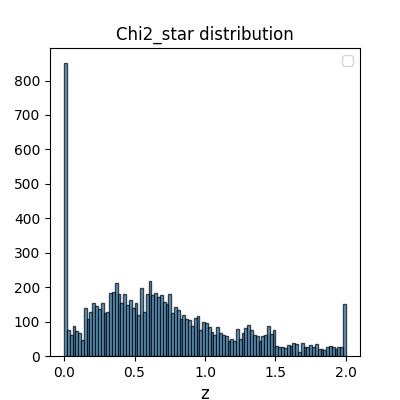

In [2]:
from scipy import stats
#Plot z hist
plt.figure(figsize=(4, 4))
plt.hist(zphota['Z_BEST'], bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Chi2_star distribution")

plt.xlabel('z', fontsize=12)
# plt.ylim(0,0.010)
plt.legend()
plt.show()

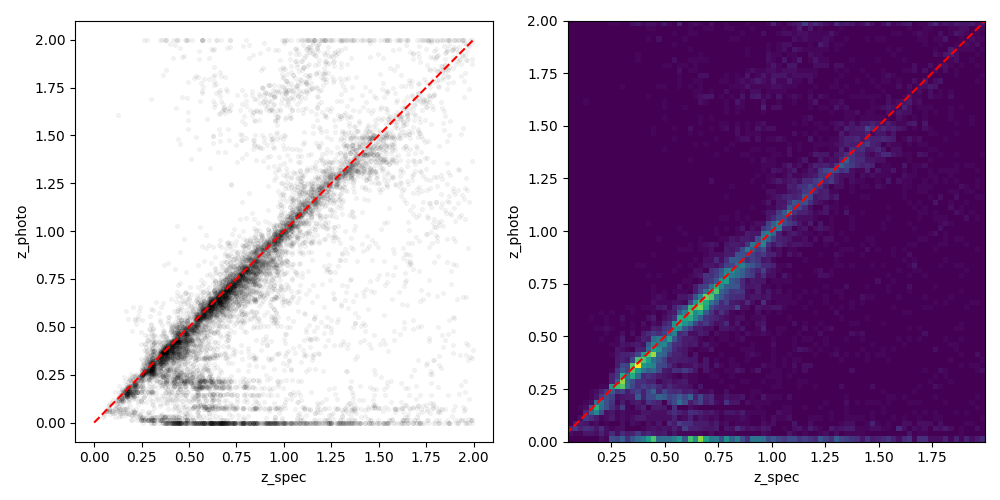

In [3]:
### First look at photometric redshift from output file
# flag_mask = zphota['PDZ_FLAG'] >=16# can apply flag mask if the ouput catalog has been pass through the pdz_flagger.py script
z_photo = zphota['Z_MODE']#[flag_mask] #computed photo z 
z_spec = zphota['ZSPEC']#[flag_mask] #initial "true" z


### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_photo, linewidth=0.3, s=10, alpha=0.05, c='k') #zz-plot


plt.plot([0, 2], [0, 2], 'r--') #1:1 scale line, corresponding to perfectly computed photometric redshift
plt.xlabel("z_spec")
plt.ylabel("z_photo")
# plt.title("photometric vs true redshift")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_photo, bins=80, cmap='viridis')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
# plt.title("photometric vs true redshift")
# plt.colorbar()

plt.tight_layout()
plt.show()

# Chi2 stats

First look at the fitting Chi2 computed during zphota run.

In [4]:
chi_star = zphota['CHI_STAR'][zphota['CHI_STAR']<1000]
chi_gal = zphota['CHI_BEST'][zphota['CHI_BEST']<1000]

/tmp/ipykernel_19371/2953126200.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


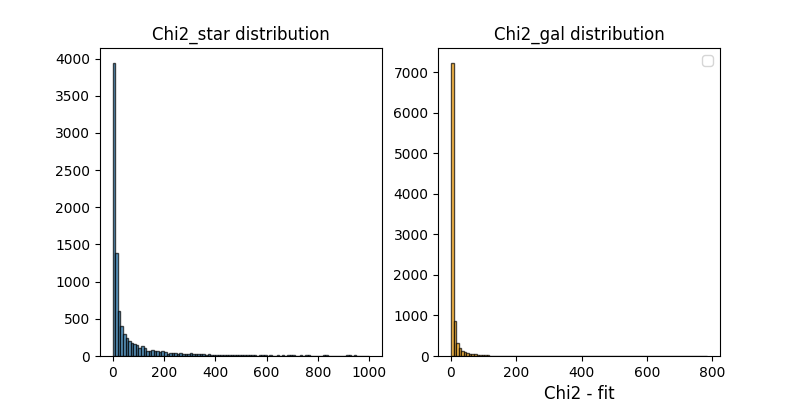

In [5]:
from scipy import stats
#Plot Chi hist
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.hist(chi_star, bins=100, alpha=0.7, edgecolor='black')#, density=True)#, log=True)
plt.title("Chi2_star distribution")
plt.subplot(122)
plt.title("Chi2_gal distribution")
plt.hist(chi_gal, bins=100, alpha=0.7, edgecolor='black', color='orange')#, density=True)#, log=True)
x = np.linspace(0.1, max(chi_star), 200)

#Chi2
# chi_star_df, chi_star_loc, chi_star_scale = stats.chi.fit(chi_star)
# print(chi_star_df, chi_star_loc, chi_star_scale)
# chi_star_pdf = stats.chi2.pdf(x, chi_star_df, loc=1.5, scale=chi_star_scale)
# plt.plot(x, chi_star_pdf, 'b-')

plt.xlabel('Chi2 - fit', fontsize=12)
# plt.ylim(0,0.010)
plt.legend()
plt.show()

Chi_star as a function of Chi_gal

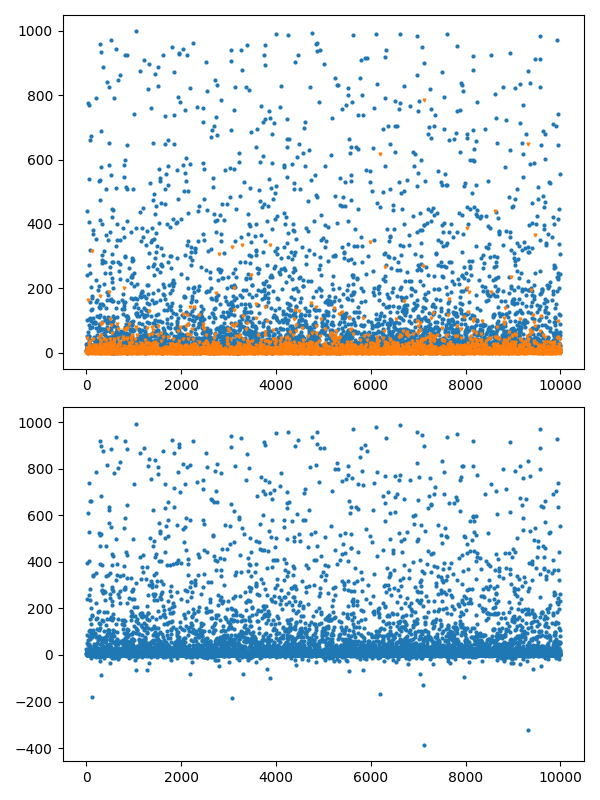

In [9]:
mask = (zphota['CHI_BEST'] < 1e3) & (zphota['CHI_STAR'] < 1e3)

plt.figure(figsize=(6,8), tight_layout=True)
plt.subplot(211)
plt.plot(zphota['CHI_STAR'][mask], markersize=2, marker="o", linestyle='None')
plt.plot(zphota['CHI_BEST'][mask], markersize=2, marker="v", linestyle='None')
plt.subplot(212)

plt.plot(zphota['CHI_STAR'][mask]-zphota['CHI_BEST'][mask], markersize=2, marker="o", linestyle='None')

plt.show()

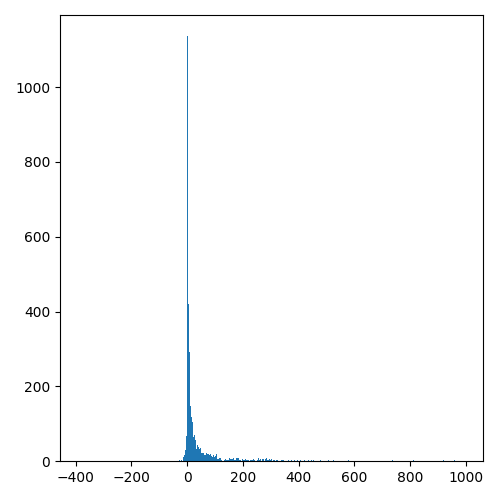

In [7]:
plt.figure(figsize=(5,5), tight_layout=True)
mask = (zphota['CHI_BEST'] < 1e3) & (zphota['CHI_STAR'] < 1e3)
plt.hist(zphota['CHI_STAR'][mask]-zphota['CHI_BEST'][mask], bins=1000)
plt.show()

# MOD_BEST statistics

The goal here is to seek for hypothetical "bad" SED(s) from the mag_gal library that could result into bad fitting results. For different error regions, we compute:

 - SED/redshitf grid VS error_flag and error_mag and relative badredshift/goodredshif
 - 

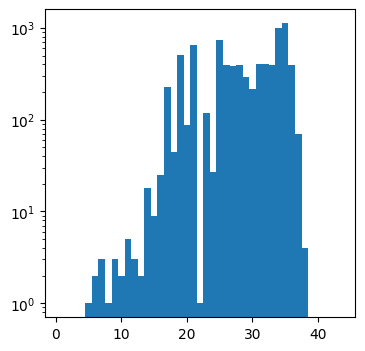

In [32]:
plt.figure(figsize=(4, 4))
# scale best hist
plt.subplot(111)
plt.hist(zphota['MOD_STAR'][zphota['CHI_STAR']<1000], range=(0.5,43.5), bins=43, log=True)
# plt.title('Scale_best distribution')
plt.show()

# Saving a particular data set from CAT.out

In [ ]:
def masking_input_cat(masked_output_df, original_input_path, new_input_path):
    """
    Filters the INPUT.dat file using the IDENT values from a masked LePhare output DataFrame
    and writes the result to a new file.

    Parameters:
    - masked_output_df: pandas DataFrame with a column named 'IDENT'
    - original_input_path: str, path to the original INPUT.dat file
    - new_input_path: str, path where the filtered INPUT.dat will be saved
    """
    # Load original input file
    input_data = []
    with open(original_input_path, "r") as f:
        for line in f:
            input_data.append(line.strip())

    # Extract IDENTs from masked output
    idents_to_keep = set(masked_output_df["IDENT"].astype(float))
    ident_list=[]
    # Write new input file with only the matching IDENTs
    with open(new_input_path, "w") as f:
        for line in input_data:
            ident = float(line.split()[0])
            if ident in idents_to_keep:
                f.write(line + "\n")
    print(f"Filtered input written to: {new_input_path}")


In [ ]:
# Filter input file based on masked output
INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/Final_Buzzard_training_file.dat'
filtered_INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat'
masking_input_cat(zphota175, INPUT_CAT, filtered_INPUT_CAT)
